In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from tynt import Filter

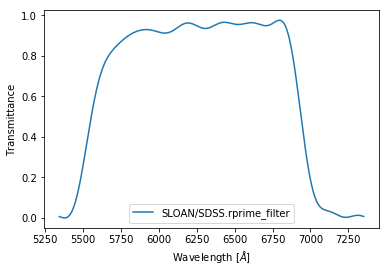

In [22]:
f = Filter()

identifier = 'SLOAN/SDSS.rprime_filter'
wl, tr = f.reconstruct(identifier)
plt.plot(wl, tr, label=identifier)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Transmittance')
plt.legend()

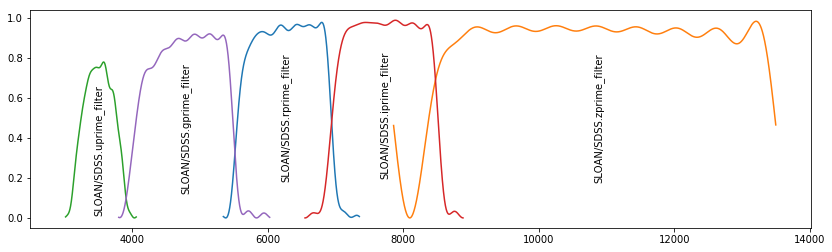

In [19]:
filters = [filt for filt in f.available_filters()
           if 'SLOAN/SDSS' in filt and 'prime' in filt]

fig, ax = plt.subplots(figsize=(14, 4))
for filt in filters: 
    wl, tr = f.reconstruct(filt)
    plt.plot(wl, tr)
    
    flux_weighted_wl = np.average(wl, weights=tr)
    
    plt.annotate(filt, xy=(flux_weighted_wl, 0.8 * tr.max()), #filt.split('.')[1]
                 rotation=90, ha='center')

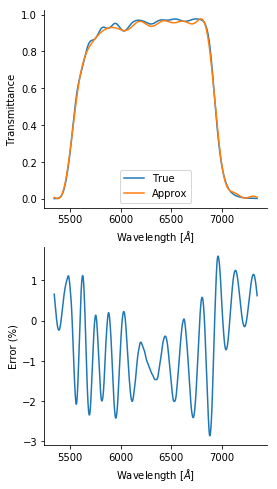

In [18]:
filt = 'SLOAN/SDSS.rprime_filter'

approx_wl, approx_tr = f.reconstruct(filt)
true_wl, true_tr = f.download_true_transmittance(filt)

fig, ax = plt.subplots(2, 1, figsize=(4, 8))
ax[0].plot(true_wl, true_tr, label='True')
ax[0].plot(approx_wl, approx_tr, label='Approx')
for axis in ax: 
    axis.set_xlabel("Wavelength [$\AA$]")
ax[0].set_ylabel("Transmittance")
ax[0].legend()
ax[1].plot(true_wl, 100*(np.interp(true_wl, approx_wl, approx_tr) - true_tr))
ax[1].set_ylabel('Error (%)')

for axis in ax: 
    for s in ['right', 'top']: 
        axis.spines[s].set_visible(False)